In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False)
import matplotlib.font_manager as fm
font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF'
font_prop = fm.FontProperties(fname=font_path, size=20)
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Embedding, SimpleRNN, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras import models
import seaborn as sns
import tensorflow.keras.utils as utils
from tensorflow.keras.callbacks import Callback

In [2]:
import tensorflow as tf
tf.random.set_seed(2)

In [3]:
suwon=pd.read_csv('data/suwon_dnn.csv', encoding='cp949', index_col=0)

In [4]:
suwon=suwon[['요일', '노면상태', '기상상태', '도로형태', '가해운전자_차종', '가해운전자_성별',
       '가해운전자_연령', '행정동', '발생월', '발생시간','사고내용']]

In [5]:
suwon=suwon[suwon['행정동']!='수원시']

In [6]:
suwon

,요일,노면상태,기상상태,도로형태,가해운전자_차종,가해운전자_성별,가해운전자_연령,행정동,발생월,발생시간,사고내용
1,금요일,포장 - 건조,맑음,단일로 - 기타,승용,남,42,대황교동,1,4,1
2,금요일,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,57,인계동,1,4,1
3,금요일,포장 - 건조,맑음,교차로 - 교차로안,화물,남,26,우만동,1,5,0
4,금요일,포장 - 건조,맑음,교차로 - 교차로부근,승용,남,23,인계동,1,6,0
5,금요일,포장 - 건조,맑음,단일로 - 기타,승용,남,31,우만동,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...
24355,목요일,포장 - 건조,맑음,단일로 - 기타,승용,남,61,영화동,12,17,0
24356,목요일,포장 - 건조,맑음,단일로 - 기타,승용,여,19,호매실동,12,18,0
24357,목요일,포장 - 건조,맑음,단일로 - 기타,원동기,남,21,입북동,12,18,0
24358,목요일,포장 - 건조,맑음,기타 - 기타,승용,남,46,매탄동,12,19,0


In [7]:
suwon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23774 entries, 1 to 24359
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   요일        23774 non-null  object
 1   노면상태      23774 non-null  object
 2   기상상태      23774 non-null  object
 3   도로형태      23774 non-null  object
 4   가해운전자_차종  23774 non-null  object
 5   가해운전자_성별  23774 non-null  object
 6   가해운전자_연령  23774 non-null  int64 
 7   행정동       23774 non-null  object
 8   발생월       23774 non-null  int64 
 9   발생시간      23774 non-null  int64 
 10  사고내용      23774 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.2+ MB


In [8]:
suwon.isna().sum()

요일          0
노면상태        0
기상상태        0
도로형태        0
가해운전자_차종    0
가해운전자_성별    0
가해운전자_연령    0
행정동         0
발생월         0
발생시간        0
사고내용        0
dtype: int64

In [9]:
suwon.columns

Index(['요일', '노면상태', '기상상태', '도로형태', '가해운전자_차종', '가해운전자_성별', '가해운전자_연령', '행정동',
       '발생월', '발생시간', '사고내용'],
      dtype='object')

In [10]:
suwon[suwon.columns[0]].unique()

array(['금요일', '토요일', '일요일', '월요일', '화요일', '수요일', '목요일'], dtype=object)

In [11]:
17804+5970

23774

In [12]:
suwon.groupby('사고내용').count()/23774

,요일,노면상태,기상상태,도로형태,가해운전자_차종,가해운전자_성별,가해운전자_연령,행정동,발생월,발생시간
사고내용,,,,,,,,,,
0,0.748885,0.748885,0.748885,0.748885,0.748885,0.748885,0.748885,0.748885,0.748885,0.748885
1,0.251115,0.251115,0.251115,0.251115,0.251115,0.251115,0.251115,0.251115,0.251115,0.251115


In [13]:
suwon.groupby(['요일','사고내용'])['사고내용'].count().to_frame()

사고내용
요일  사고내용      
금요일 0     2788
    1      924
목요일 0     2683
    1      872
수요일 0     2566
    1      919
월요일 0     2533
    1      840
일요일 0     2010
    1      683
토요일 0     2733
    1      880
화요일 0     2491
    1      852

In [14]:
dic_yoil={'금':2788/(2788+924), '목':2683/(2683+872), '수':2566/(2566+919), '월':2533/(2533+840), '일':2010/(2010+683), '토':2733/(2733+880), '화':2491/(2491+852)}

In [15]:
sorted(dic_yoil.items(), key=(lambda x:x[1]), reverse=True)

[('토', 0.7564350954885137),
 ('목', 0.7547116736990155),
 ('금', 0.7510775862068966),
 ('월', 0.7509635339460421),
 ('일', 0.746379502413665),
 ('화', 0.7451390966198026),
 ('수', 0.7362984218077475)]

In [16]:
yoil2idx={'월요일':3 , '화요일':1, '수요일':0, '목요일':5, '금요일':4, '토요일':6, '일요일':2}
idx2yoil={2:'일요일', 3:'월요일', 1:'화요일', 0:'수요일', 5:'목요일', 4:'금요일', 6:'토요일'}

In [17]:
suwon[suwon.columns[1]].unique()

array(['포장 - 건조', '포장 - 습기', '포장 - 결빙', '포장 - 적설', '포장 - 기타', '비포장 - 습기',
       '비포장 - 건조', '포장 - 젖음/습기', '포장 - 서리/결빙', '비포장 - 젖음/습기', '포장 - 해빙',
       '포장 - 침수'], dtype=object)

In [18]:
suwon.groupby(['노면상태','사고내용'])['사고내용'].count().to_frame()

사고내용
노면상태        사고내용       
비포장 - 건조    0         3
            1         1
비포장 - 습기    0         1
비포장 - 젖음/습기 0         9
            1         1
포장 - 건조     0     16037
            1      5348
포장 - 결빙     0        34
            1         6
포장 - 기타     0        88
            1        24
포장 - 서리/결빙  0        78
            1        26
포장 - 습기     0       297
            1       123
포장 - 적설     0        42
            1        12
포장 - 젖음/습기  0      1213
            1       428
포장 - 침수     1         1
포장 - 해빙     0         2

In [19]:
dic_nom={'비포장 - 건조':3/4, '비포장 - 습기':1/1, '비포장 - 젖음/습기':9/10, '포장 - 건조':16037/(16037+5348), '포장 - 결빙':34/(34+6), '포장 - 기타':88/(88+24), '포장 - 서리/결빙':78/(78+26), '포장 - 습기':297/(297+123), '포장 - 적설':42/(42+12), '포장 - 젖음/습기':1213/(1213+428), '포장 - 침수':0/1, '포장 - 해빙':2/2}

In [20]:
sorted(dic_nom.items(), key=(lambda x:x[1]), reverse=True)

[('비포장 - 습기', 1.0),
 ('포장 - 해빙', 1.0),
 ('비포장 - 젖음/습기', 0.9),
 ('포장 - 결빙', 0.85),
 ('포장 - 기타', 0.7857142857142857),
 ('포장 - 적설', 0.7777777777777778),
 ('비포장 - 건조', 0.75),
 ('포장 - 서리/결빙', 0.75),
 ('포장 - 건조', 0.7499181669394436),
 ('포장 - 젖음/습기', 0.7391834247410116),
 ('포장 - 습기', 0.7071428571428572),
 ('포장 - 침수', 0.0)]

In [21]:
nom2idx={'포장 - 건조':3, '포장 - 습기':1, '포장 - 결빙':8, '포장 - 적설':6, '포장 - 기타':7, '비포장 - 습기':10, '비포장 - 건조':5, '포장 - 젖음/습기':2, '포장 - 서리/결빙':4, '비포장 - 젖음/습기':9, '포장 - 해빙':11, '포장 - 침수':0}
idx2nom={3:'포장 - 건조', 1:'포장 - 습기', 8:'포장 - 결빙', 6:'포장 - 적설', 7:'포장 - 기타', 10:'비포장 - 습기', 5:'비포장 - 건조', 2:'포장 - 젖음/습기', 4:'포장 - 서리/결빙', 9:'비포장 - 젖음/습기', 11:'포장 - 해빙', 0:'포장 - 침수'}

In [22]:
suwon[suwon.columns[2]].unique()

array(['맑음', '흐림', '안개', '눈', '비', '기타'], dtype=object)

In [23]:
suwon.groupby(['기상상태','사고내용'])['사고내용'].count().to_frame()

사고내용
기상상태 사고내용       
기타   0        48
     1        15
눈    0       110
     1        32
맑음   0     15948
     1      5307
비    0      1161
     1       424
안개   0         3
     1         5
흐림   0       534
     1       187

In [24]:
dic_gs={'기타':48/(48+15), '눈':110/(110+32), '맑음':15948/(15948+5307), '비':1161/(1161+424), '안개':3/8, '흐림':534/(534+187)}

In [25]:
sorted(dic_gs.items(), key=(lambda x:x[1]), reverse=True)

[('눈', 0.7746478873239436),
 ('기타', 0.7619047619047619),
 ('맑음', 0.750317572335921),
 ('흐림', 0.7406380027739251),
 ('비', 0.7324921135646688),
 ('안개', 0.375)]

In [26]:
gs2idx={'맑음':3, '흐림':2, '안개':0, '눈':5, '비':1, '기타':4}
idx2gs={3:'맑음', 2:'흐림', 0:'안개', 5:'눈', 1:'비', 4:'기타'}

In [27]:
suwon[suwon.columns[3]].unique()

array(['단일로 - 기타', '교차로 - 교차로부근', '교차로 - 교차로안', '단일로 - 횡단보도상',
       '단일로 - 횡단보도부근', '미분류 - 미분류', '기타 - 기타', '단일로 - 터널', '단일로 - 교량',
       '교차로 - 교차로횡단보도내', '단일로 - 지하차도(도로)내', '단일로 - 고가도로위', '주차장 - 주차장'],
      dtype=object)

In [28]:
suwon.groupby(['도로형태','사고내용'])['사고내용'].count().to_frame()

사고내용
도로형태            사고내용      
교차로 - 교차로부근     0     3200
                1      863
교차로 - 교차로안      0     5424
                1     1957
교차로 - 교차로횡단보도내  0      414
                1      270
기타 - 기타         0      679
                1      244
단일로 - 고가도로위     0       53
                1       17
단일로 - 교량        0       32
                1        9
단일로 - 기타        0     7774
                1     2493
단일로 - 지하차도(도로)내 0       41
                1       20
단일로 - 터널        0       53
                1       21
단일로 - 횡단보도부근    0       14
                1        6
단일로 - 횡단보도상     0       61
                1       49
미분류 - 미분류       0       39
                1       16
주차장 - 주차장       0       20
                1        5

In [29]:
dic_doro={'단일로 - 기타':7774/(7774+2493), '교차로 - 교차로부근':3200/(3200+863), '교차로 - 교차로안':5424/(5424+1957), '단일로 - 횡단보도상':61/(61+49), '단일로 - 횡단보도부근':14/(14+6), '미분류 - 미분류':39/(39+16), '기타 - 기타':679/(679+244), '단일로 - 터널':53/(53+21), '단일로 - 교량':32/(32+9), '교차로 - 교차로횡단보도내':414/(414+270), '단일로 - 지하차도(도로)내':41/(41+20), '단일로 - 고가도로위':53/(53+17), '주차장 - 주차장':20/25}

In [30]:
sorted(dic_doro.items(), key=(lambda x:x[1]), reverse=True)

[('주차장 - 주차장', 0.8),
 ('교차로 - 교차로부근', 0.7875953728771844),
 ('단일로 - 교량', 0.7804878048780488),
 ('단일로 - 기타', 0.7571832083373916),
 ('단일로 - 고가도로위', 0.7571428571428571),
 ('기타 - 기타', 0.7356446370530878),
 ('교차로 - 교차로안', 0.7348597750982252),
 ('단일로 - 터널', 0.7162162162162162),
 ('미분류 - 미분류', 0.7090909090909091),
 ('단일로 - 횡단보도부근', 0.7),
 ('단일로 - 지하차도(도로)내', 0.6721311475409836),
 ('교차로 - 교차로횡단보도내', 0.6052631578947368),
 ('단일로 - 횡단보도상', 0.5545454545454546)]

In [31]:
doro2idx={'단일로 - 기타':9, '교차로 - 교차로부근':11, '교차로 - 교차로안':6, '단일로 - 횡단보도상':0, '단일로 - 횡단보도부근':3, '미분류 - 미분류':4, '기타 - 기타':6, '단일로 - 터널':5, '단일로 - 교량':10, '교차로 - 교차로횡단보도내':1, '단일로 - 지하차도(도로)내':2, '단일로 - 고가도로위':8, '주차장 - 주차장':12}
idx2doro={0:'단일로 - 기타', 1:'교차로 - 교차로부근', 2:'교차로 - 교차로안', 3:'단일로 - 횡단보도상', 4:'단일로 - 횡단보도부근', 5:'미분류 - 미분류', 6:'기타 - 기타', 7:'단일로 - 터널', 8:'단일로 - 교량', 9:'교차로 - 교차로횡단보도내', 10:'단일로 - 지하차도(도로)내', 11:'단일로 - 고가도로위', 12:'주차장 - 주차장'}

In [32]:
suwon[suwon.columns[4]].unique()

array(['승용', '화물', '승합', '이륜', '원동기', '자전거', '건설기계', '특수', '농기계', '기타불명',
       '사륜오토바이(ATV)', '개인형이동수단(PM)'], dtype=object)

In [33]:
suwon.groupby(['가해운전자_차종','사고내용'])['사고내용'].count().to_frame()

사고내용
가해운전자_차종    사고내용       
개인형이동수단(PM) 0        37
            1        18
건설기계        0       155
            1        60
기타불명        0         9
농기계         0         4
            1         1
사륜오토바이(ATV) 0         2
            1         1
승용          0     12641
            1      4005
승합          0      1431
            1       630
원동기         0       160
            1        50
이륜          0      1222
            1       468
자전거         0       522
            1       165
특수          0        68
            1        20
화물          0      1553
            1       552

In [34]:
dic_gacha={'승용':12641/(12641+4005), '화물':1553/(1553+552), '승합':1431/(1431+630), '이륜':1222/(1222+468), '원동기':160/(160+50), '자전거':522/(522+165), '건설기계':155/(155+60), '특수':68/(68+20), '농기계':4/5, '기타불명':9/9, '사륜오토바이(ATV)':2/3, '개인형이동수단(PM)':37/(37+18)}

In [35]:
sorted(dic_gacha.items(), key=(lambda x:x[1]), reverse=True)

[('기타불명', 1.0),
 ('농기계', 0.8),
 ('특수', 0.7727272727272727),
 ('원동기', 0.7619047619047619),
 ('자전거', 0.759825327510917),
 ('승용', 0.7594016580559895),
 ('화물', 0.7377672209026128),
 ('이륜', 0.7230769230769231),
 ('건설기계', 0.7209302325581395),
 ('승합', 0.6943231441048034),
 ('개인형이동수단(PM)', 0.6727272727272727),
 ('사륜오토바이(ATV)', 0.6666666666666666)]

In [36]:
gacha2idx={'승용':6, '화물':5, '승합':2, '이륜':4, '원동기':8, '자전거':7, '건설기계':3, '특수':9, '농기계':10, '기타불명':11, '사륜오토바이(ATV)':0, '개인형이동수단(PM)':1}
idx2gacha={0:'승용', 1:'화물', 2:'승합', 3:'이륜', 4:'원동기', 5:'자전거', 6:'건설기계', 7:'특수', 8:'농기계', 9:'기타불명', 10:'사륜오토바이(ATV)', 11:'개인형이동수단(PM)'}

In [37]:
suwon[suwon.columns[5]].unique()

array(['남', '여'], dtype=object)

In [38]:
suwon.groupby(['가해운전자_성별','사고내용'])['사고내용'].count().to_frame()

사고내용
가해운전자_성별 사고내용       
남        0     13739
         1      4723
여        0      4065
         1      1247

In [39]:
13739/(13739+4723), 4065/(4065+1247)

(0.7441772289026107, 0.7652484939759037)

In [40]:
gasung2idx={'남':0, '여':1}
idx2gasung={0:'남', 1:'여'}

In [41]:
suwon[suwon.columns[7]].unique()

array(['대황교동', '인계동', '우만동', '영통동', '세류동', '파장동', '권선동', '송죽동', '영화동',
       '정자동', '곡반정동', '이의동', '화서동', '고색동', '서둔동', '입북동', '원천동', '조원동',
       '연무동', '매탄동', '이목동', '망포동', '평동', '매교동', '탑동', '신동', '매산로1가',
       '율전동', '금곡동', '하동', '천천동', '북수동', '팔달로3가', '지동', '중동', '남수동',
       '하광교동', '당수동', '구운동', '고등동', '팔달로1가', '영동', '매산로2가', '교동', '팔달로2가',
       '매향동', '오목천동', '매산로3가', '호매실동', '구천동', '신풍동', '상광교동', '평리동', '장안동',
       '장지동', '남창동'], dtype=object)

In [42]:
suwon.groupby(['행정동','사고내용'])['사고내용'].count().to_frame()

사고내용
행정동  사고내용      
고등동  0      186
     1       60
고색동  0      560
     1      141
곡반정동 0      238
...         ...
하동   1       61
호매실동 0      325
     1      119
화서동  0      623
     1      173

[112 rows x 1 columns]

In [43]:
dong2idx={'대황교동':0, '인계동':1, '우만동':2, '영통동':3, '세류동':4, '파장동':5, '권선동':6, '송죽동':7, '영화동':8,
       '정자동':9, '곡반정동':10, '이의동':11, '화서동':12, '고색동':13, '서둔동':14, '입북동':15, '원천동':16, '조원동':17,
       '연무동':18, '매탄동':19, '이목동':20, '망포동':21, '평동':22, '매교동':23, '탑동':24, '신동':25, '매산로1가':26,
       '율전동':27, '금곡동':28, '하동':29, '천천동':30, '북수동':31, '팔달로3가':32, '지동':33, '중동':34, '남수동':35,
       '하광교동':36, '당수동':37, '구운동':38, '고등동':39, '팔달로1가':40, '영동':41, '매산로2가':42, '교동':43, '팔달로2가':44,
       '매향동':45, '오목천동':46, '매산로3가':47, '호매실동':48, '구천동':49, '신풍동':50, '상광교동':51, '평리동':52, '장안동':53,
       '장지동':54, '남창동':55}
idx2dong={0:'대황교동', 1:'인계동', 2:'우만동', 3:'영통동', 4:'세류동', 5:'파장동', 6:'권선동', 7:'송죽동', 8:'영화동',
       9:'정자동', 10:'곡반정동', 11:'이의동', 12:'화서동', 13:'고색동', 14:'서둔동', 15:'입북동', 16:'원천동', 17:'조원동',
       18:'연무동', 19:'매탄동', 20:'이목동', 21:'망포동', 22:'평동', 23:'매교동', 24:'탑동', 25:'신동', 26:'매산로1가',
       27:'율전동', 28:'금곡동', 29:'하동', 30:'천천동', 31:'북수동', 32:'팔달로3가', 33:'지동', 34:'중동', 35:'남수동',
       36:'하광교동', 37:'당수동', 38:'구운동', 39:'고등동', 40:'팔달로1가', 41:'영동', 42:'매산로2가', 43:'교동', 44:'팔달로2가',
       45:'매향동', 46:'오목천동', 47:'매산로3가', 48:'호매실동', 49:'구천동', 50:'신풍동', 51:'상광교동', 52:'평리동', 53:'장안동',
       54:'장지동', 55:'남창동'}

# 1.DNN

In [44]:
suwon_cp=suwon.copy()

In [45]:
suwon_cp['요일']=suwon_cp['요일'].map(yoil2idx)/(len(yoil2idx)-1)

In [46]:
#suwon_cp['요일']=(suwon_cp['요일']*(len(yoil2idx)-1)).map(idx2yoil)

In [47]:
suwon_cp['노면상태']=suwon_cp['노면상태'].map(nom2idx)/(len(nom2idx)-1)

In [48]:
suwon_cp['기상상태']=suwon_cp['기상상태'].map(gs2idx)/(len(gs2idx)-1)

In [49]:
suwon_cp['도로형태']=suwon_cp['도로형태'].map(doro2idx)/(len(doro2idx)-1)

In [50]:
suwon_cp['가해운전자_차종']=suwon_cp['가해운전자_차종'].map(gacha2idx)/(len(gacha2idx)-1)

In [51]:
suwon_cp['가해운전자_성별']=suwon_cp['가해운전자_성별'].map(gasung2idx)

In [52]:
max_value=suwon_cp['가해운전자_연령'].max()
min_value=suwon_cp['가해운전자_연령'].min()

In [53]:
suwon_cp['가해운전자_연령']=(suwon_cp['가해운전자_연령']-min_value)/(max_value-min_value)

In [54]:
suwon_cp['행정동']=suwon_cp['행정동'].map(dong2idx)/(len(dong2idx)-1)

In [55]:
suwon_cp['발생월']=(suwon_cp['발생월']-1)/11

In [56]:
suwon_cp['발생시간']=suwon_cp['발생시간']/23

In [57]:
suwon.columns

Index(['요일', '노면상태', '기상상태', '도로형태', '가해운전자_차종', '가해운전자_성별', '가해운전자_연령', '행정동',
       '발생월', '발생시간', '사고내용'],
      dtype='object')

In [58]:
suwon_cp=suwon_cp[['요일', '노면상태', '기상상태', '도로형태', '가해운전자_차종', '가해운전자_성별',
       '가해운전자_연령', '행정동', '발생월', '발생시간','사고내용']]

In [59]:
suwon_cp

,요일,노면상태,기상상태,도로형태,가해운전자_차종,가해운전자_성별,가해운전자_연령,행정동,발생월,발생시간,사고내용
1,0.666667,0.272727,0.6,0.750000,0.545455,0,0.413043,0.000000,0.0,0.173913,1
2,0.666667,0.272727,0.6,0.916667,0.545455,0,0.576087,0.018182,0.0,0.173913,1
3,0.666667,0.272727,0.6,0.500000,0.454545,0,0.239130,0.036364,0.0,0.217391,0
4,0.666667,0.272727,0.6,0.916667,0.545455,0,0.206522,0.018182,0.0,0.260870,0
5,0.666667,0.272727,0.6,0.750000,0.545455,0,0.293478,0.036364,0.0,0.478261,0
...,...,...,...,...,...,...,...,...,...,...,...
24355,0.833333,0.272727,0.6,0.750000,0.545455,0,0.619565,0.145455,1.0,0.739130,0
24356,0.833333,0.272727,0.6,0.750000,0.545455,1,0.163043,0.872727,1.0,0.782609,0
24357,0.833333,0.272727,0.6,0.750000,0.727273,0,0.184783,0.272727,1.0,0.782609,0
24358,0.833333,0.272727,0.6,0.500000,0.545455,0,0.456522,0.345455,1.0,0.826087,0


In [84]:
suwon_cp.corr(method='spearman')

,요일,노면상태,기상상태,도로형태,가해운전자_차종,가해운전자_성별,가해운전자_연령,행정동,발생월,발생시간,사고내용
요일,1.000000,0.020608,0.019664,0.001510,0.010478,-0.017846,-0.021380,-0.002793,0.009360,-0.011107,-0.014032
노면상태,0.020608,1.000000,0.771452,0.015816,-0.007815,0.012205,-0.001083,0.018865,-0.024348,-0.012747,-0.014782
기상상태,0.019664,0.771452,1.000000,0.015210,-0.003250,0.022151,0.008120,0.016349,-0.037238,-0.014386,-0.012378
도로형태,0.001510,0.015816,0.015210,1.000000,-0.015021,-0.035704,-0.001700,0.010147,-0.008325,0.007400,-0.061483
가해운전자_차종,0.010478,-0.007815,-0.003250,-0.015021,1.000000,0.218529,-0.087361,-0.033411,0.000444,-0.010476,-0.043382
가해운전자_성별,-0.017846,0.012205,0.022151,-0.035704,0.218529,1.000000,-0.002329,0.003616,0.000954,0.007733,-0.020240
가해운전자_연령,-0.021380,-0.001083,0.008120,-0.001700,-0.087361,-0.002329,1.000000,0.048967,0.005073,-0.021318,0.012487
행정동,-0.002793,0.018865,0.016349,0.010147,-0.033411,0.003616,0.048967,1.000000,-0.004450,0.037867,-0.001351
발생월,0.009360,-0.024348,-0.037238,-0.008325,0.000444,0.000954,0.005073,-0.004450,1.000000,0.011406,-0.005781
발생시간,-0.011107,-0.012747,-0.014386,0.007400,-0.010476,0.007733,-0.021318,0.037867,0.011406,1.000000,-0.023900


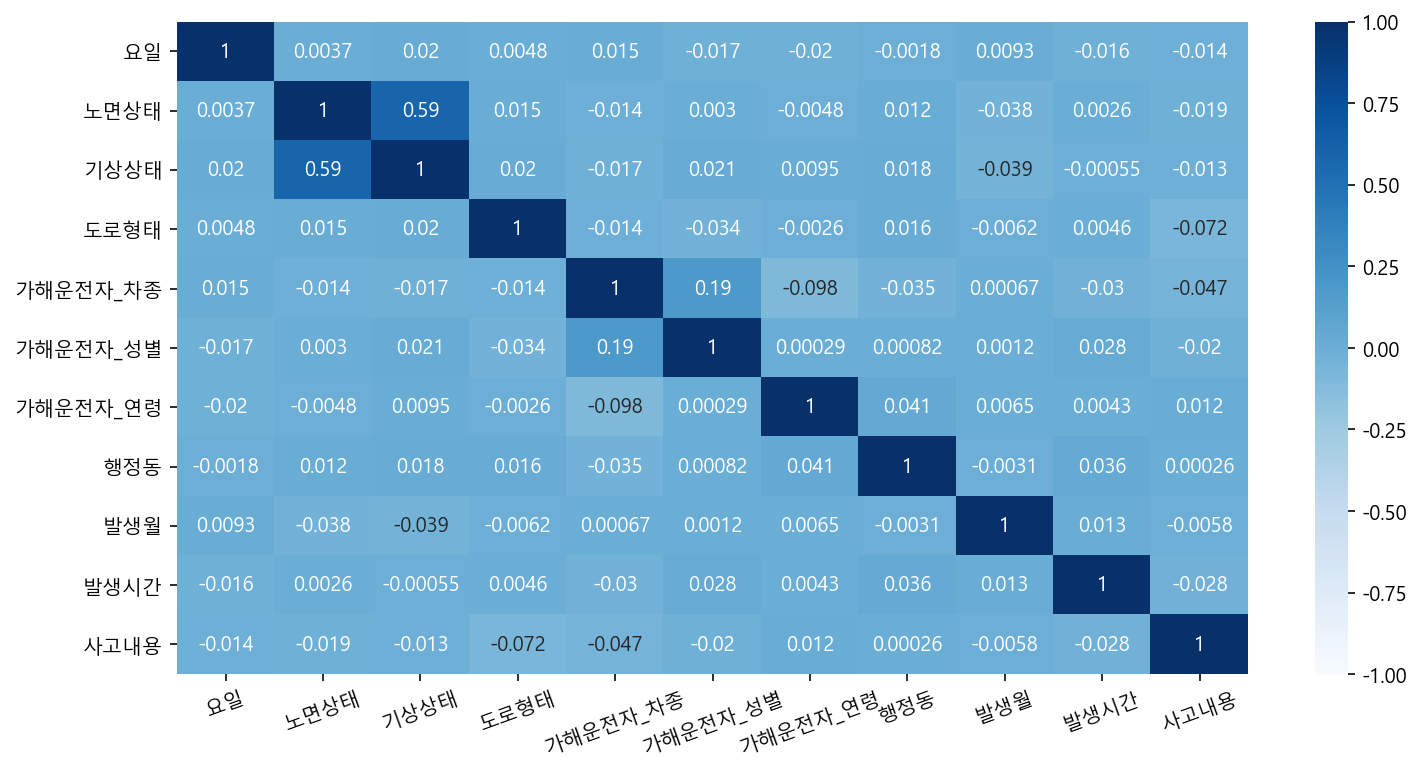

In [82]:
plt.figure(figsize=(12,6))
g=sns.heatmap(suwon_cp.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues")
g.set_xticklabels(labels=suwon_cp.columns,rotation=20, size=10)
plt.savefig('img1.png')

In [63]:
Input = suwon_cp.iloc[:,:-1]
Target = suwon_cp.iloc[:,[-1]]

In [64]:
Input.shape, Target.shape

((23774, 10), (23774, 1))

In [65]:
Input

,요일,노면상태,기상상태,도로형태,가해운전자_차종,가해운전자_성별,가해운전자_연령,행정동,발생월,발생시간
1,0.666667,0.272727,0.6,0.750000,0.545455,0,0.413043,0.000000,0.0,0.173913
2,0.666667,0.272727,0.6,0.916667,0.545455,0,0.576087,0.018182,0.0,0.173913
3,0.666667,0.272727,0.6,0.500000,0.454545,0,0.239130,0.036364,0.0,0.217391
4,0.666667,0.272727,0.6,0.916667,0.545455,0,0.206522,0.018182,0.0,0.260870
5,0.666667,0.272727,0.6,0.750000,0.545455,0,0.293478,0.036364,0.0,0.478261
...,...,...,...,...,...,...,...,...,...,...
24355,0.833333,0.272727,0.6,0.750000,0.545455,0,0.619565,0.145455,1.0,0.739130
24356,0.833333,0.272727,0.6,0.750000,0.545455,1,0.163043,0.872727,1.0,0.782609
24357,0.833333,0.272727,0.6,0.750000,0.727273,0,0.184783,0.272727,1.0,0.782609
24358,0.833333,0.272727,0.6,0.500000,0.545455,0,0.456522,0.345455,1.0,0.826087


In [66]:
Input.iloc[1]

요일          0.666667
노면상태        0.272727
기상상태        0.600000
도로형태        0.916667
가해운전자_차종    0.545455
가해운전자_성별    0.000000
가해운전자_연령    0.576087
행정동         0.018182
발생월         0.000000
발생시간        0.173913
Name: 2, dtype: float64

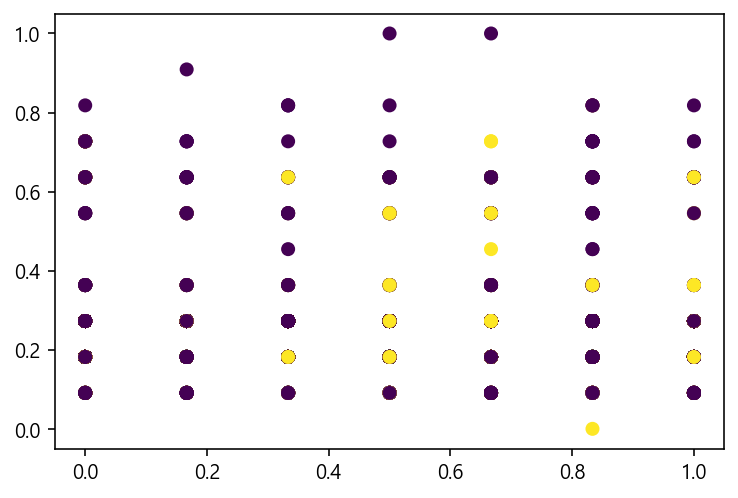

In [67]:
plot_x = Input.to_numpy()[:,0]
plot_y = Input.to_numpy()[:,1]
plot_color = Target.to_numpy().reshape(23774,)
plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

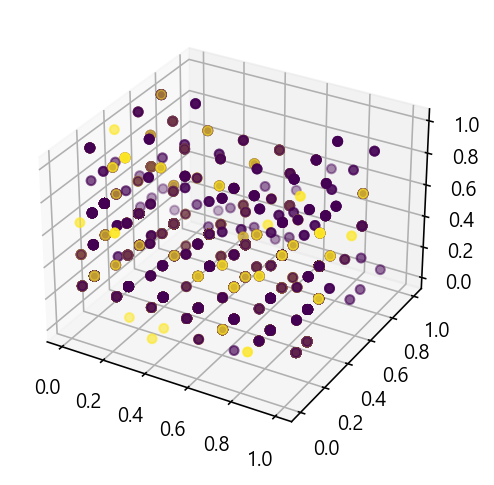

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_x = Input.to_numpy()[:,0]
plot_y = Input.to_numpy()[:,1]
plot_z = Input.to_numpy()[:,2]
plot_color = Target.to_numpy().reshape(23774,)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Input, Target, test_size=0.2, random_state=5)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((19019, 10), (19019, 1), (4755, 10), (4755, 1))

In [70]:
model = Sequential()
model.add(Dense(units=128, input_dim=10,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [71]:
from tensorflow.keras import metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Recall(), metrics.Precision()])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=2, validation_split=0.2)

In [72]:
class LossHistory(Callback):
    def __init__(self):
        self.epoch = 0
        self.losses = []
        self.accuracy = []
        self.recall = []
        self.precision = []
        self.val_losses = []
        self.val_accuracy = []
        self.val_recall= []
        self.val_precision = []
    def on_epoch_end(self, batch, logs={}):
        self.val_accuracy.append(logs.get('val_accuracy'))
        self.val_recall.append(logs.get('val_recall'))
        if self.epoch % 100 == 0:
            print("epoch: {0} - val_acc: {1:8.6f} - val_recall : {2:8.6f}".format(self.epoch, logs.get('val_accuracy'), logs.get('val_recall')))
        self.epoch += 1
history = LossHistory()
for epoch in range(2000):
    model.fit(X_train, Y_train, epochs=1, batch_size=32, verbose=0, callbacks=[history], validation_split=0.2)
    if (history.val_accuracy[-1] > 0.7)&(history.val_recall[-1] > 0.1):
        print("epoch:{} - val_recall:{} - 종료".\
              format(epoch, history.val_recall[-1]))
        break;

epoch: 0 - val_acc: 0.748686 - val_recall : 0.000000
epoch: 100 - val_acc: 0.739485 - val_recall : 0.024059
epoch: 200 - val_acc: 0.730284 - val_recall : 0.047071
epoch: 300 - val_acc: 0.723712 - val_recall : 0.051255
epoch: 400 - val_acc: 0.711619 - val_recall : 0.071130
epoch: 500 - val_acc: 0.715300 - val_recall : 0.075314
epoch: 600 - val_acc: 0.710042 - val_recall : 0.082636
epoch: 700 - val_acc: 0.708465 - val_recall : 0.080544
epoch:727 - val_recall:0.10041841119527817 - 종료


In [ ]:
hist.history.keys()

In [ ]:
Input[1:2]

In [ ]:
model.predict(Input[1:2])

In [78]:
score = model.evaluate(X_test,Y_test)

149/149 [==============================] - 0s 829us/step - loss: 0.5605 - accuracy: 0.7495 - recall: 0.0186 - precision: 0.4314 


In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred>0.5)
print('f1_score : ', f1_score(Y_test, pred))
pd.DataFrame(confusion_matrix(pred, Y_test), index=['예측-중상해X','예측-중상해O'], columns=['실제-중상해X','실제-중상해O'])

f1_score :  0.035627530364372474


,실제-중상해X,실제-중상해O
예측-중상해X,3542,1162
예측-중상해O,29,22


In [76]:
model.save('dnnmodel2.h5')

In [77]:
model=models.load_model('dnnmodel.h5')

In [ ]:
pd.DataFrame(pred).value_counts()

In [ ]:
(3556+17)/(4712+43)

In [ ]:
suwon_cp['사고내용'].value_counts()

In [ ]:
Y_test.value_counts()

In [ ]:
Y_train.value_counts()

# 2. RNN형 문장으로 인식

In [ ]:
suwon_cp2=suwon.copy()

In [ ]:
suwon_cp2

In [ ]:
suwon_cp2['요일']=suwon_cp2['요일'].map(yoil2idx)

In [ ]:
#suwon_cp2['요일']=suwon_cp2['요일'].map(yoil2idx)
suwon_cp2['노면상태']=suwon_cp2['노면상태'].map(nom2idx)
suwon_cp2['기상상태']=suwon_cp2['기상상태'].map(gs2idx)
suwon_cp2['도로형태']=suwon_cp2['도로형태'].map(doro2idx)
suwon_cp2['가해운전자_차종']=suwon_cp2['가해운전자_차종'].map(gacha2idx)
suwon_cp2['가해운전자_성별']=suwon_cp2['가해운전자_성별'].map(gasung2idx)
suwon_cp2['행정동']=suwon_cp2['행정동'].map(dong2idx)

In [ ]:
suwon_cp2

In [ ]:
dataset=suwon_cp2.to_numpy()

In [ ]:
vocab_size=dataset.max()+1

In [ ]:
X = dataset[:,:-1]
Y = dataset[:,-1]

In [ ]:
X_train=X[:-3800]
X_val=X[-3800:-200]
X_test=X[-200:]
Y_train=Y[:-3800]
Y_val=Y[-3800:-200]
Y_test=Y[-200:]

In [ ]:
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

## 2.1 순환 컨볼루션 신경망 모델

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=vocab_size-1, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

class LossHistory(Callback):
    def __init__(self):
        self.epoch = 0
        self.losses = []
        self.accuracy=[]
        self.val_loss = []
        self.val_accuracy = []
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('accuracy'))
        self.val_loss.append(logs.get('val_loss'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        if self.epoch % 100 == 0:
            print("epoch: {0} - loss: {1:8.6f} - acc: {2:8.6f} - val_loss: {3:8.6f} - val_acc: {4:8.6f}".format(self.epoch, logs.get('loss'), logs.get('accuracy'), logs.get('val_loss'), logs.get('val_accuracy')))
        self.epoch += 1
history = LossHistory()
for epoch in range(2000):
    model.fit(X_train, Y_train, epochs=1, batch_size=50, verbose=0, shuffle=False, validation_data=(X_val,Y_val),
             callbacks=[history])
    if (history.losses[-1] < 1e-5):
        print("epoch:{} - loss:{} - 종료".\
              format(epoch, history.losses[-1]))
        break;
    model.reset_states() 

## 2.2 다중 퍼셉트론 신경망 모델

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=vocab_size-1, input_length=X.shape[1]))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_val, Y_val))